In [291]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [292]:
import autoreload
import evotsc
import evotsc_plot
autoreload.reload(evotsc)
autoreload.reload(evotsc_plot)

<module 'evotsc_plot' from '/Users/theotime/Work/Code/EvoTSC/evotsc_plot.py'>

In [293]:
import pickle

In [334]:
# Constants
intergene = 1000
interaction_dist = 2500
interaction_coef = 0.3
default_basal_expression = 1.0
nb_eval_steps=51
beta_A = 0.15
beta_B = 0.30
nb_genes = 60
nb_indivs = 1000

In [396]:
label_fontsize=20
tick_fontsize=15
legend_fontsize=15

In [628]:
genes_fig_1 = evotsc.Gene.generate(intergene=intergene, nb_genes=13)
genes_fig_1[0].orientation = 1
genes_fig_1[1].orientation = 0
genes_fig_1[2].orientation = 0
genes_fig_1[3].orientation = 1
genes_fig_1[4].orientation = 0
genes_fig_1[5].orientation = 0
genes_fig_1[6].orientation = 1
genes_fig_1[7].orientation = 1
genes_fig_1[8].orientation = 0
genes_fig_1[9].orientation = 1
genes_fig_1[10].orientation = 0
genes_fig_1[11].orientation = 0
genes_fig_1[12].orientation = 0

In [657]:
def plot_expr(indiv, plot_title, plot_name, print_legend=True, alpha_legend=False):
    
    letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    # Plot only environment A
    (temporal_expr, _), fitness = indiv.evaluate()

    nb_genes, nb_steps = temporal_expr.shape

    colors = mpl.cm.get_cmap('viridis', nb_genes)(range(nb_genes))

    plt.figure(figsize=(9, 5), dpi=200)

    plt.ylim(-0.1, 2.1)

    for gene in range(nb_genes):
        linestyle = 'solid' if indiv.genes[gene].orientation == 0 else 'dashed'
        if alpha_legend:
            gene_name = letters[indiv.genes[gene].id]
        else:
            gene_name = indiv.genes[gene].id
            
        color = colors[indiv.genes[gene].id]
                
        if alpha_legend:
            if indiv.genes[gene].id == 1: # Gène B
                color = 'tab:red'
                zorder = 100
            elif indiv.genes[gene].id == 2: # Gène C
                color = 'deeppink'
                zorder = 101
            else:
                zorder = gene
        else:
            zorder = gene
            
        plt.plot(temporal_expr[gene, :],
                 linestyle=linestyle,
                 linewidth=3,
                 color=color,
                 zorder=zorder,
                 label=f'Gene {gene_name}')

    plt.grid(linestyle=':')
    plt.xlabel('Time', fontsize=label_fontsize)
    plt.ylabel('Expression level', fontsize=label_fontsize)
    
    plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
    if print_legend:
        plt.legend(loc='center right', fontsize=legend_fontsize, ncol=2)

    plt.savefig(plot_name, dpi=300, bbox_inches='tight')


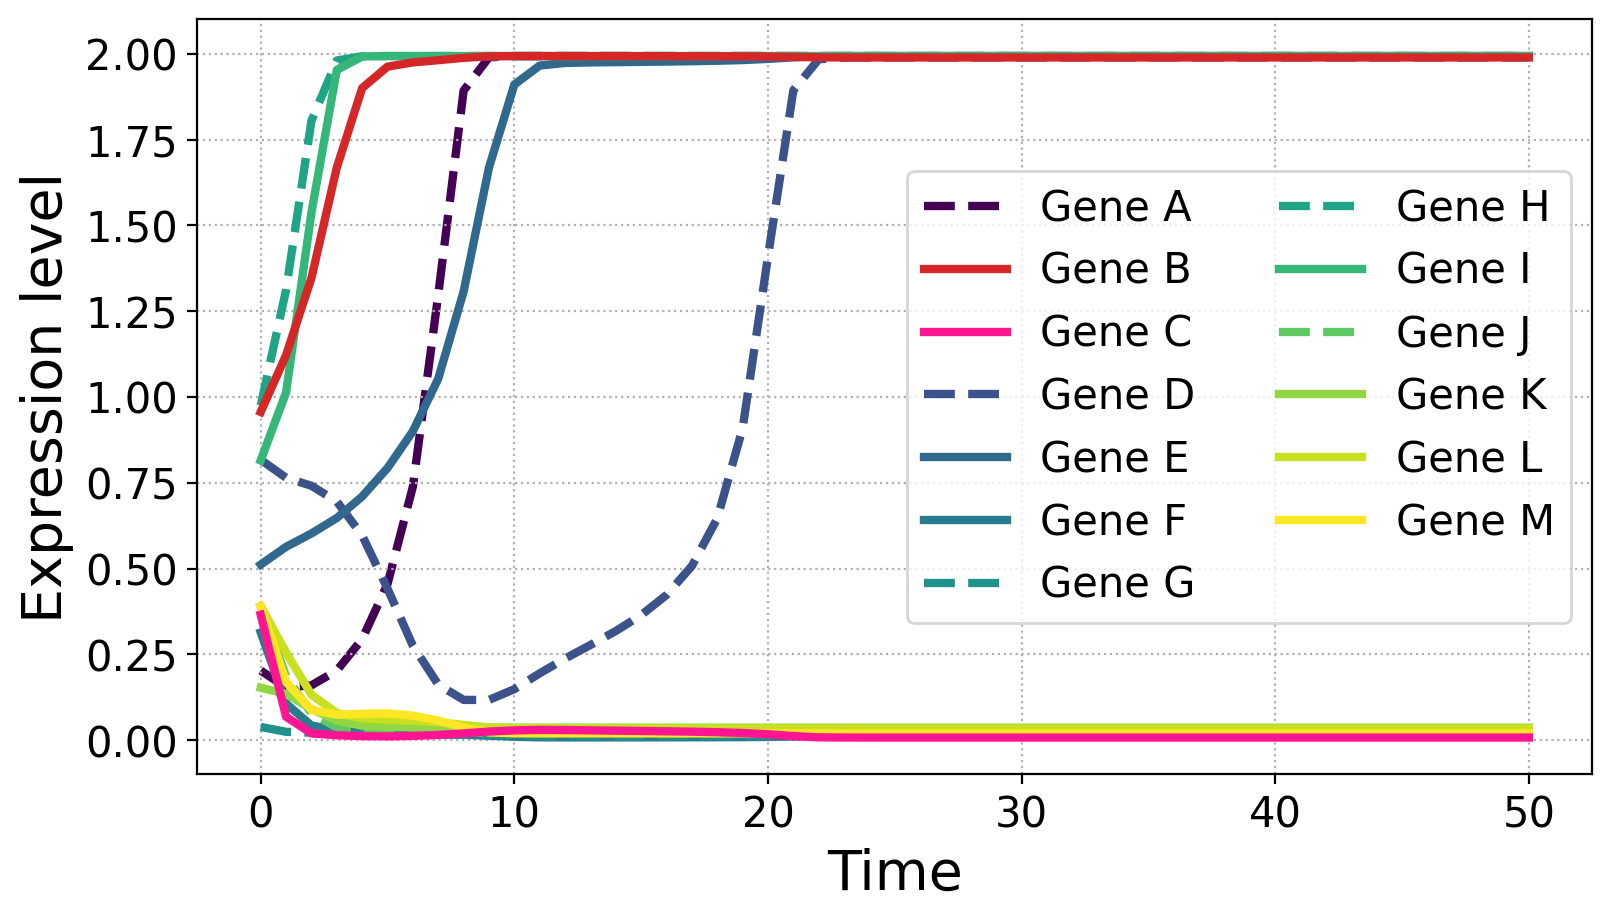

In [658]:
indiv_fig_1 = evotsc.Individual(genes=genes_fig_1,
                          interaction_dist=interaction_dist,
                          interaction_coef=interaction_coef,
                          nb_eval_steps=nb_eval_steps,
                          beta_A=beta_A, beta_B=beta_B)

plot_expr(indiv_fig_1, '', '13genes_example', alpha_legend=True)

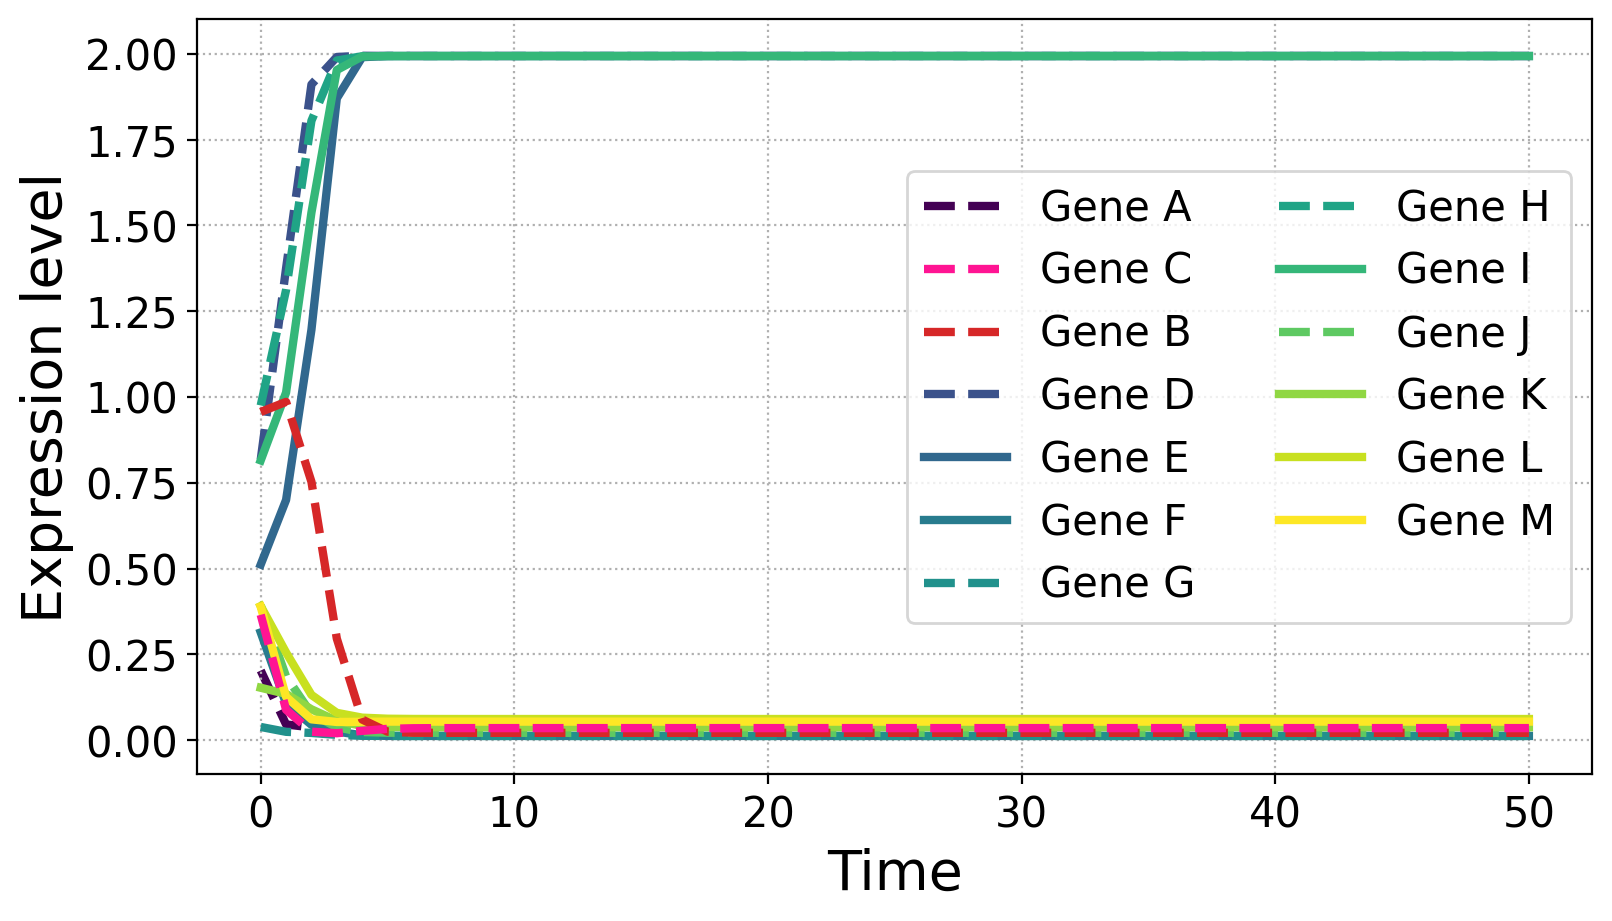

In [659]:
indiv_inversion = indiv_fig_1.clone()

indiv_inversion.perform_inversion(start_pos=500,
                                  end_pos=2500)
    
indiv_inversion.already_evaluated=False

plot_expr(indiv_inversion, '', '13genes_inversion', alpha_legend=True)

In [646]:
def plot_activ():
    
    #sigma1 = lambda x: np.tanh(x - 1.0) + 1.0
    #sigma2 = lambda x: np.tanh((x - 1.0) + 0.5) + 1.0
    #sigma3 = lambda x: np.tanh((x - 1.0) - 0.5) + 1.0
    
    betas = [-0.25, 0, 0.25]
    sigmas = []
    for beta in betas:
        sigmas.append(lambda x: np.tanh(2*(x - 1.0) + beta) + 1.0)
    
    
    xs = np.linspace(-0.5, 2.5, 1000)
    
    x_star = [1.2558, 1, 0.7442] # magic
    
    plt.figure(figsize=(9,5), dpi=300)
    
    colors = ['tab:blue', 'tab:green', 'tab:orange']

    for i_beta, beta in enumerate(betas):
        plt.plot(xs, sigmas[i_beta](xs),
                 linewidth=2,
                 color=colors[i_beta],
                 label=rf'$\beta$ = {beta}')
        plt.plot(x_star[i_beta], x_star[i_beta],
                 color=colors[i_beta],
                 marker='*',
                 markersize=12)

    # Identity
    plt.plot(xs, xs, linewidth=2, color='tab:red', alpha=.75)
    
    plt.legend(fontsize=legend_fontsize)
    
    plt.grid(linestyle=':')
    plt.xlabel(r'Local supercoiling variation $\Delta\sigma$', fontsize=label_fontsize)
    plt.ylabel('Final expression level', fontsize=label_fontsize)
    
    plt.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    
    plt.savefig('activation',bbox_inches='tight')

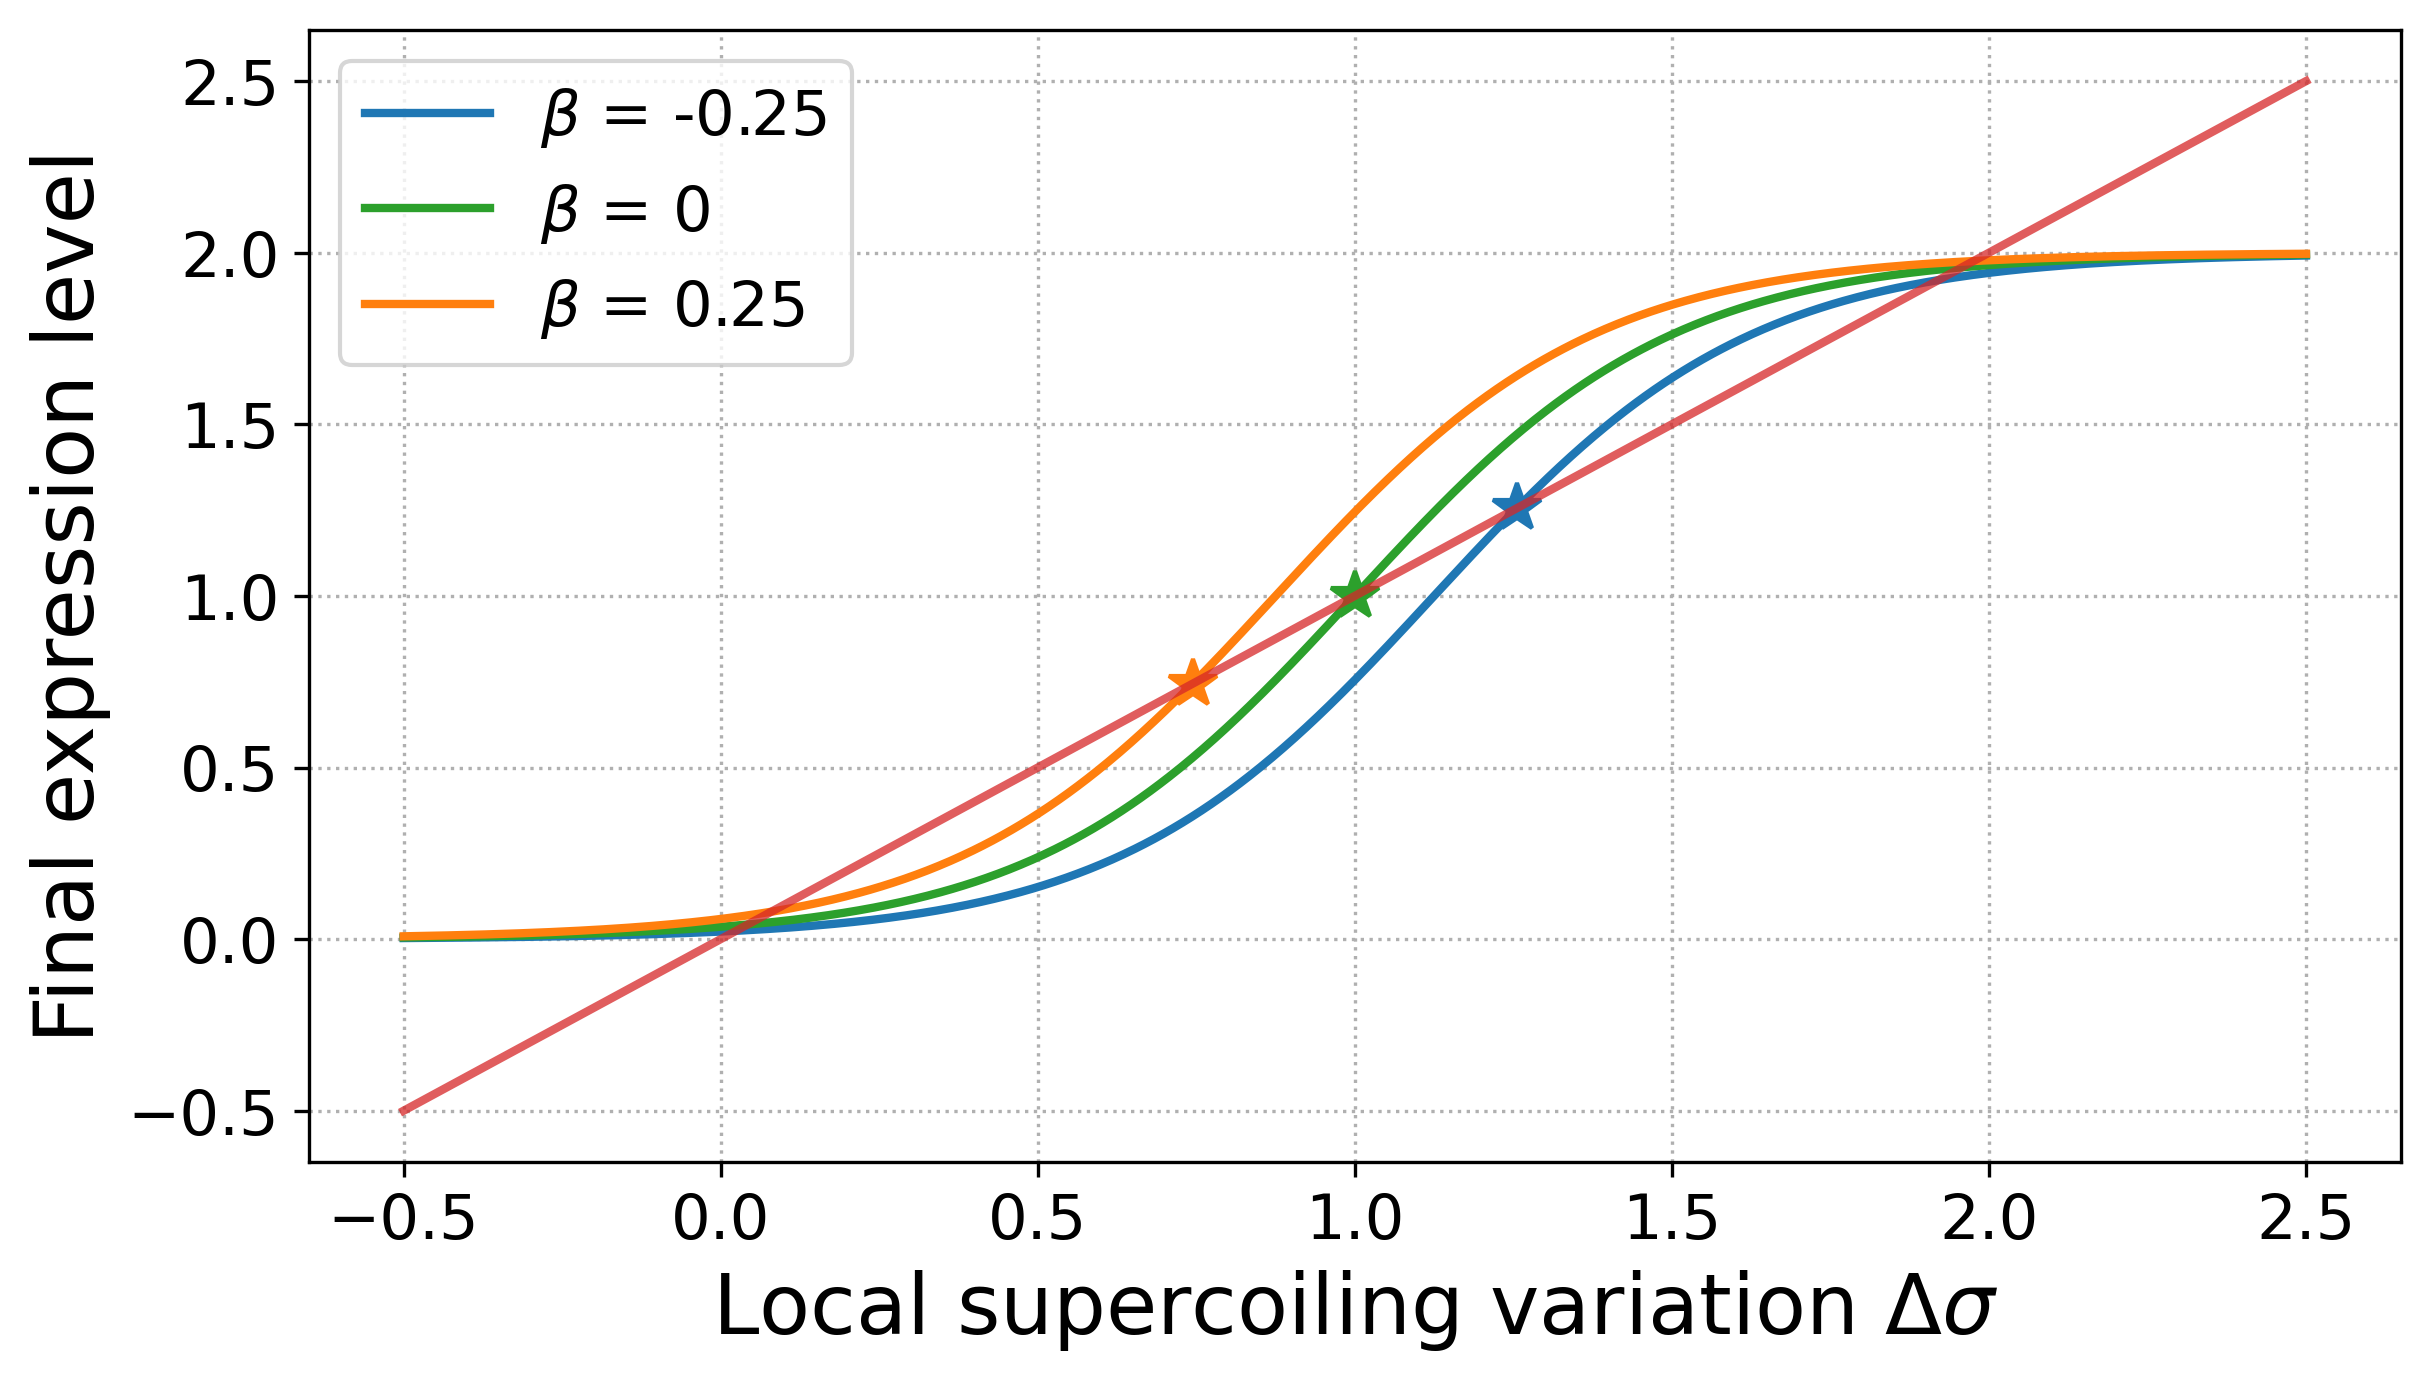

In [647]:
plot_activ()

In [468]:
beta_values = [-0.30, -0.15, 0.0, 0.15, 0.30, 0.45]

In [474]:
ok_indiv = beta_indiv

In [635]:
beta_genes = evotsc.Gene.generate(intergene=intergene, nb_genes=10)

Beta: -0.3, activated genes: 0
Beta: -0.15, activated genes: 1
Beta: 0.0, activated genes: 2
Beta: 0.15, activated genes: 3
Beta: 0.3, activated genes: 6
Beta: 0.45, activated genes: 6


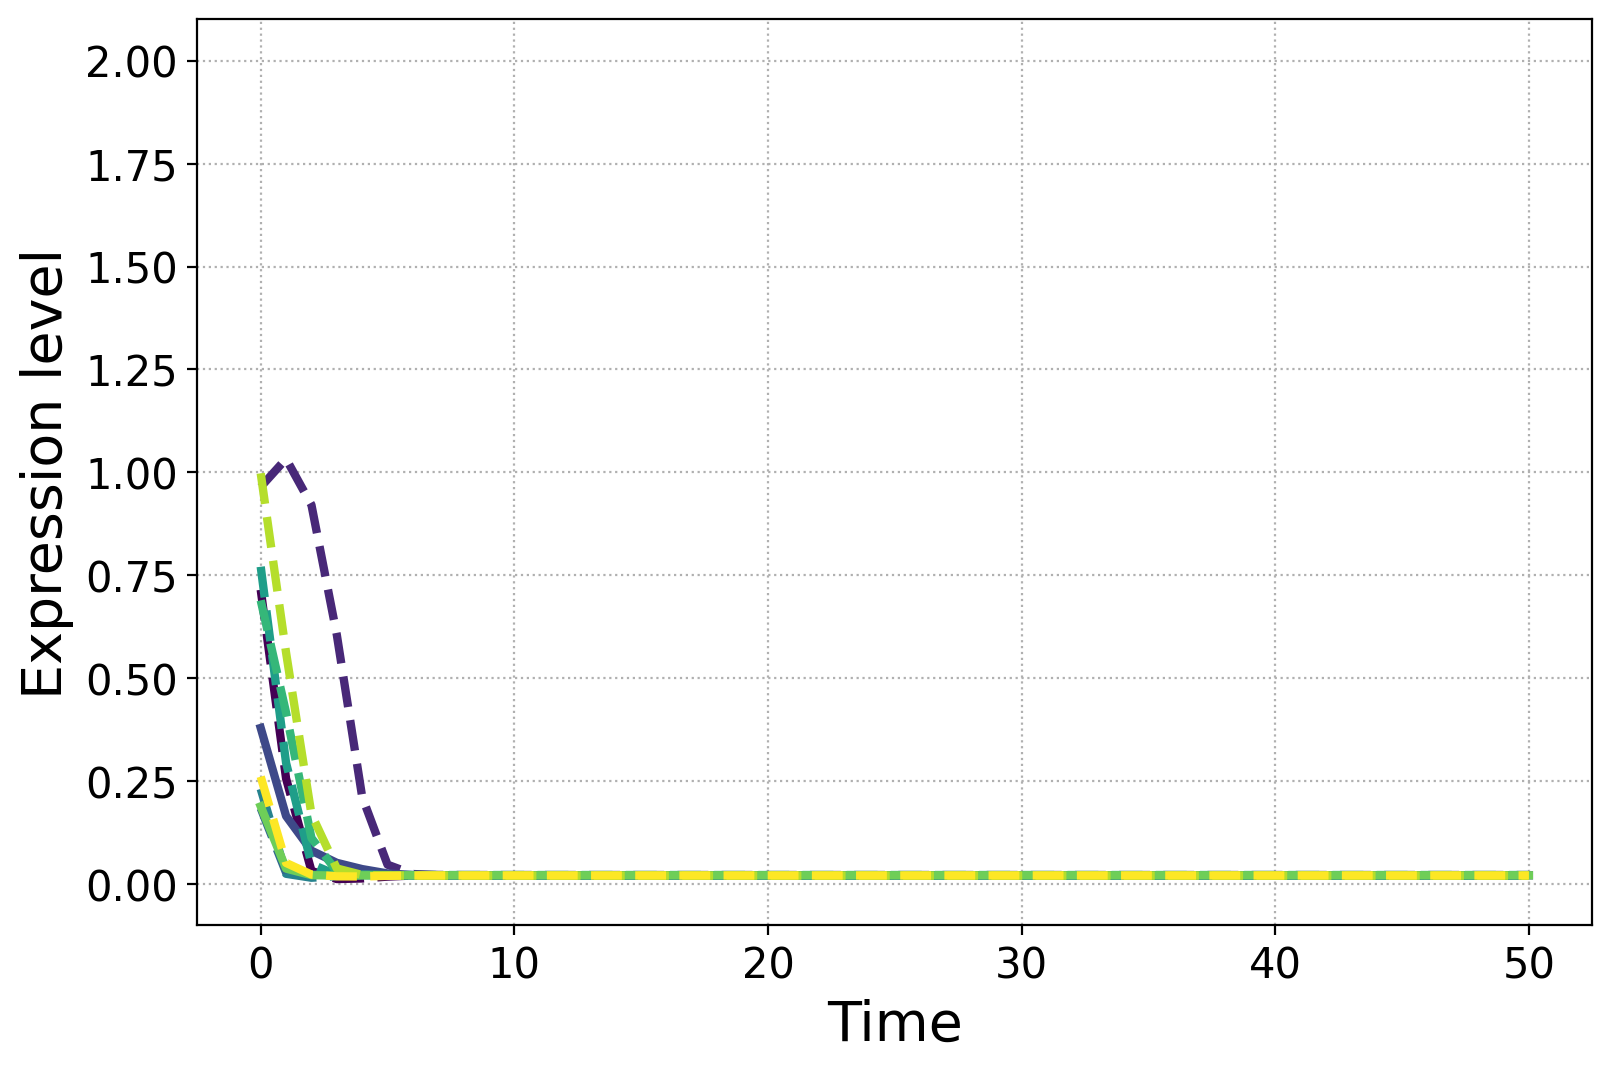

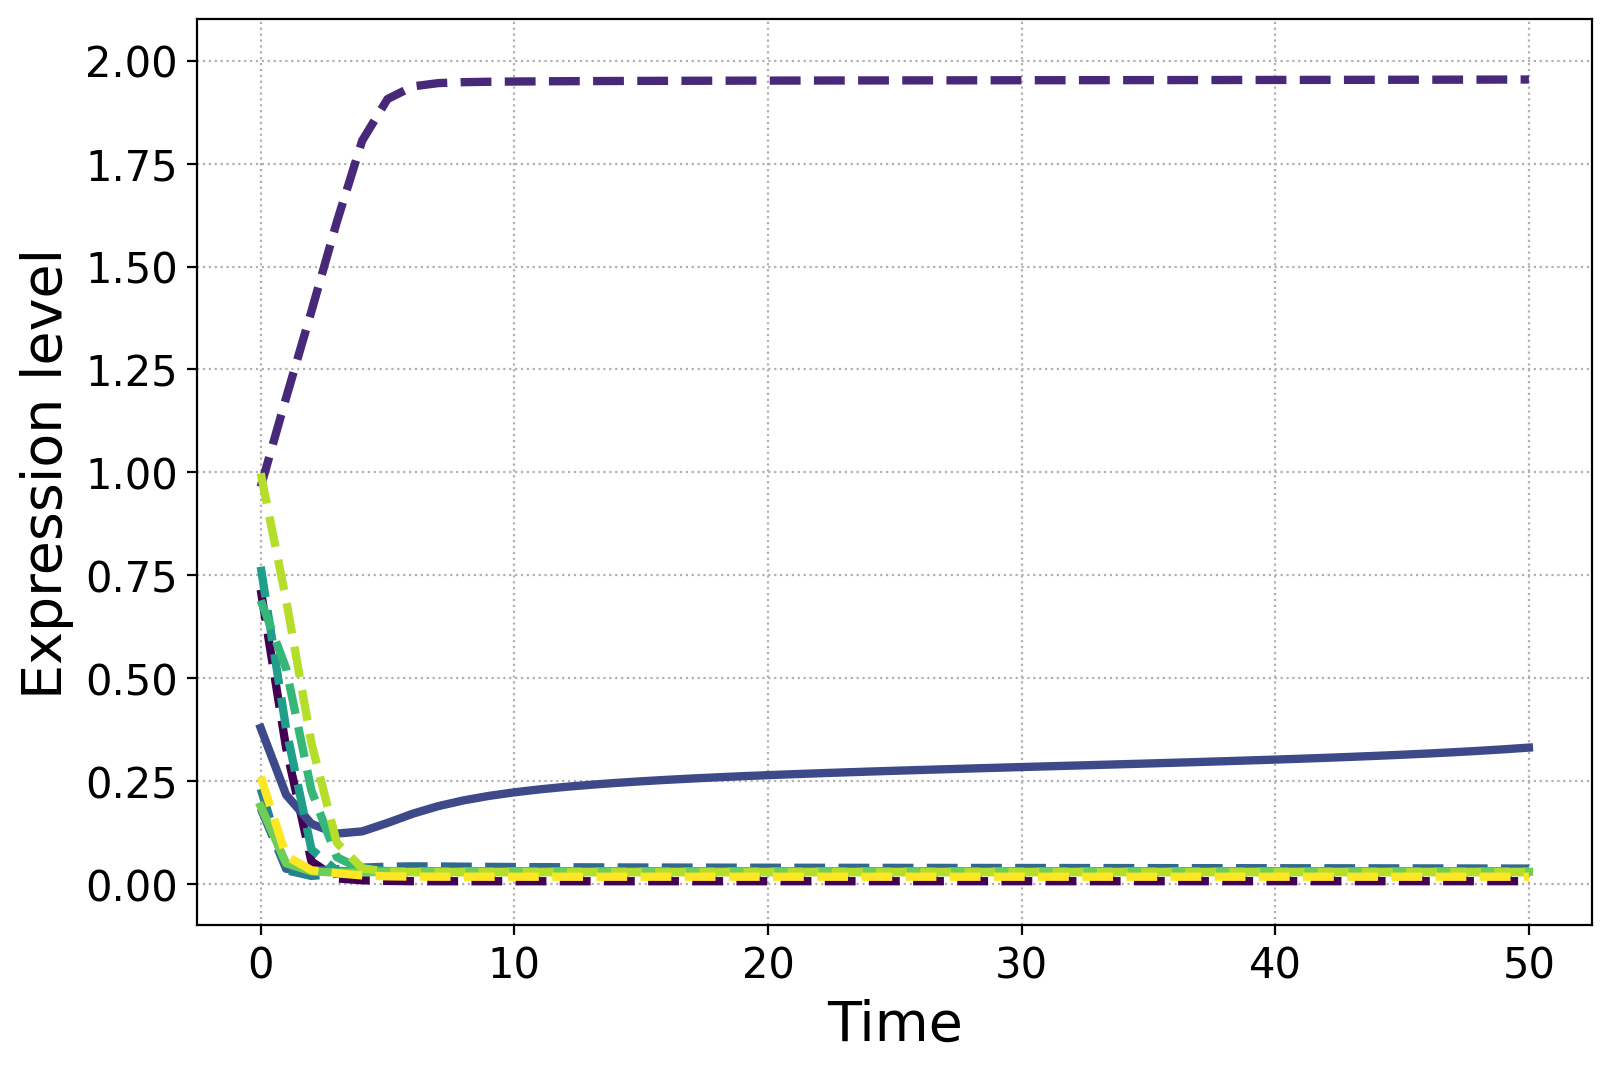

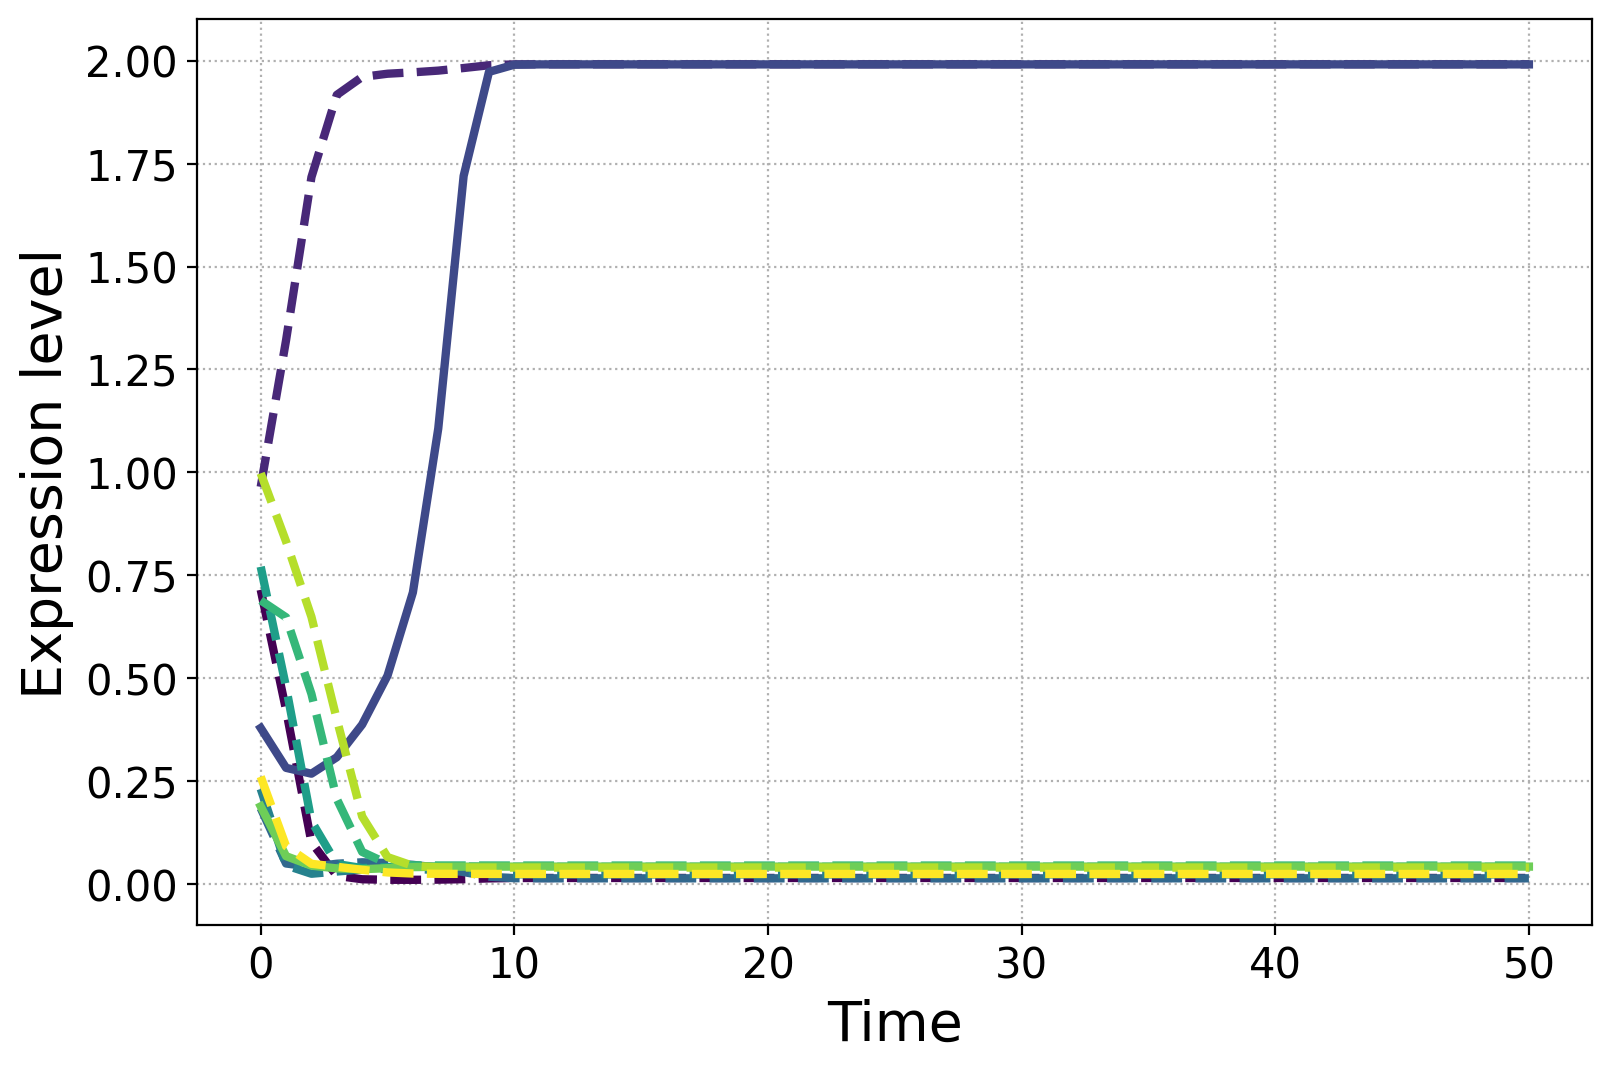

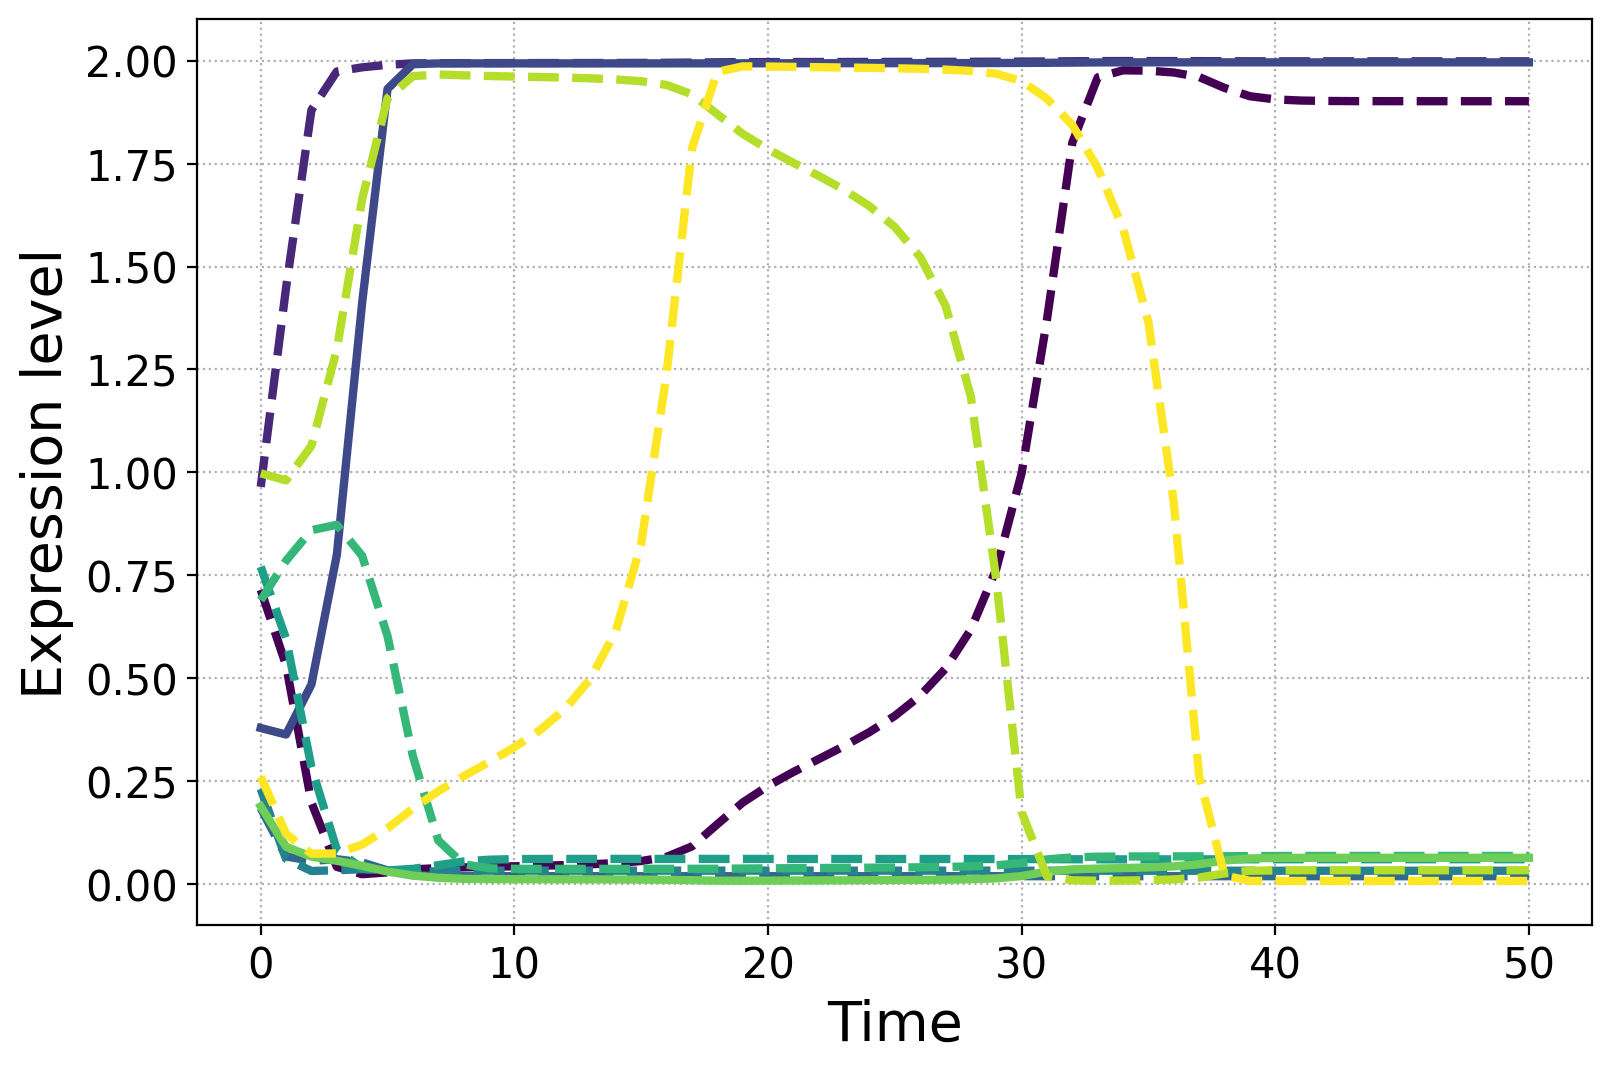

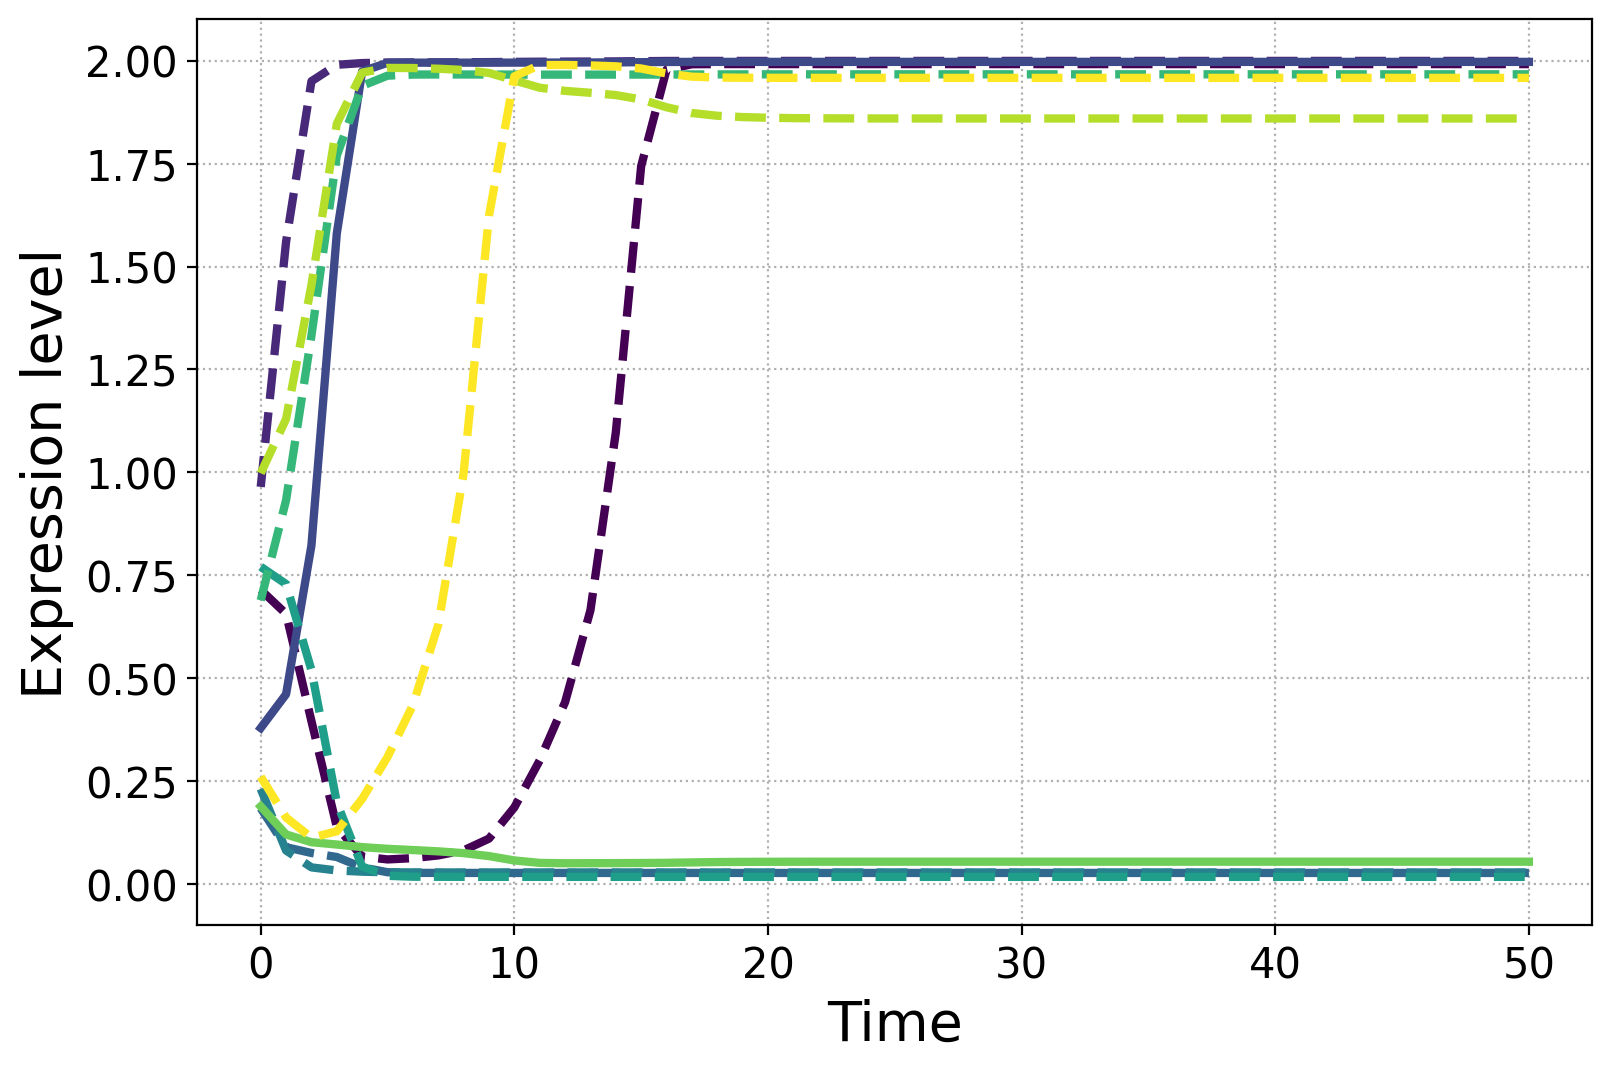

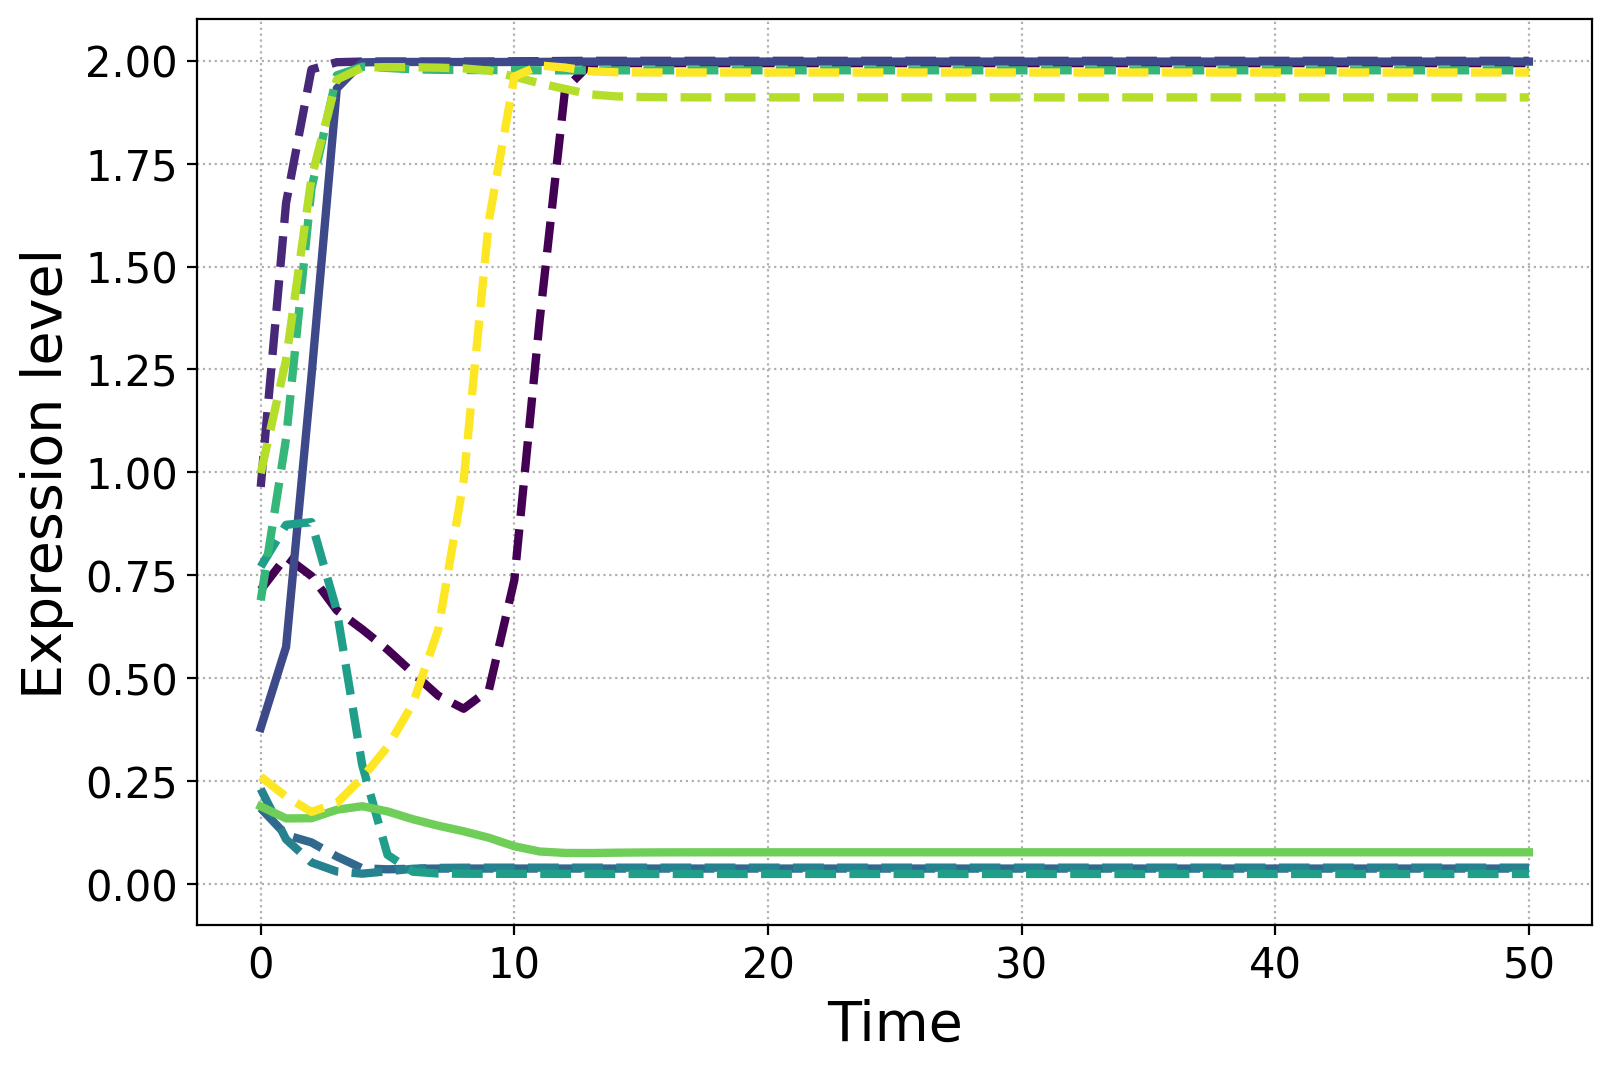

In [650]:
for i_beta, beta in enumerate(beta_values):
    beta_indiv = evotsc.Individual(genes=beta_genes,
                                   interaction_dist=interaction_dist,
                                   interaction_coef=interaction_coef,
                                   nb_eval_steps=nb_eval_steps,
                                   beta_A=beta, beta_B=beta_B)
    plot_expr(beta_indiv, '', f'beta_{i_beta}.png', print_legend=False)
    on_genes_A, off_genes_A, on_genes_B, off_genes_B = beta_indiv.summarize()
    print(f'Beta: {beta}, activated genes: {np.sum(on_genes_A)}')
